# Playing with the data :)

In [98]:
!pip install scipy.io
!pip install scipy
!pip install matplotlib
!pip install tensorflow
!pip install numpy

ERROR: Could not find a version that satisfies the requirement scipy.io (from versions: none)
ERROR: No matching distribution found for scipy.io


In [99]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf



mat = loadmat('/content/Xtrain.mat')
data = mat['Xtrain']
def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr
norm_data= normalize_array(data)
my_list = map(lambda x: x[0], norm_data)
xtrain = pd.Series(my_list)

In [100]:
xtrain.keys()

RangeIndex(start=0, stop=1000, step=1)

In [101]:
print(np.mean(xtrain, axis=0))  # Mean of each column (if it's a 2D matrix)
print(np.std(xtrain, axis=0))   # Standard deviation of each column


0.22883003952569173
0.18518572266414643


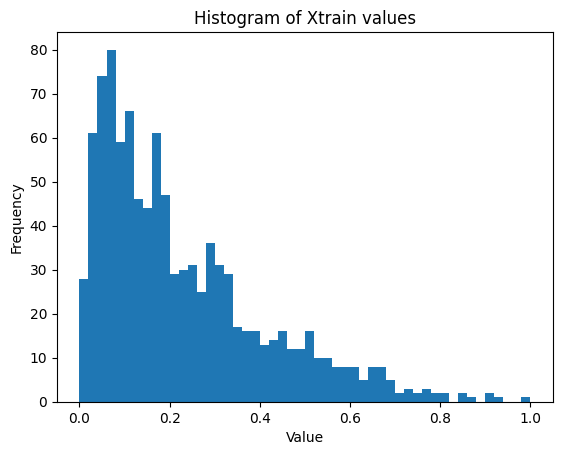

In [102]:
plt.hist(norm_data.flatten(), bins=50)
plt.title("Histogram of Xtrain values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [103]:
mean_value = np.mean(xtrain)
std_dev = np.std(xtrain)
min_value = np.min(xtrain)
max_value = np.max(xtrain)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: 0.22883003952569173
Standard Deviation: 0.18518572266414643
Min Value: 0.0
Max Value: 1.0


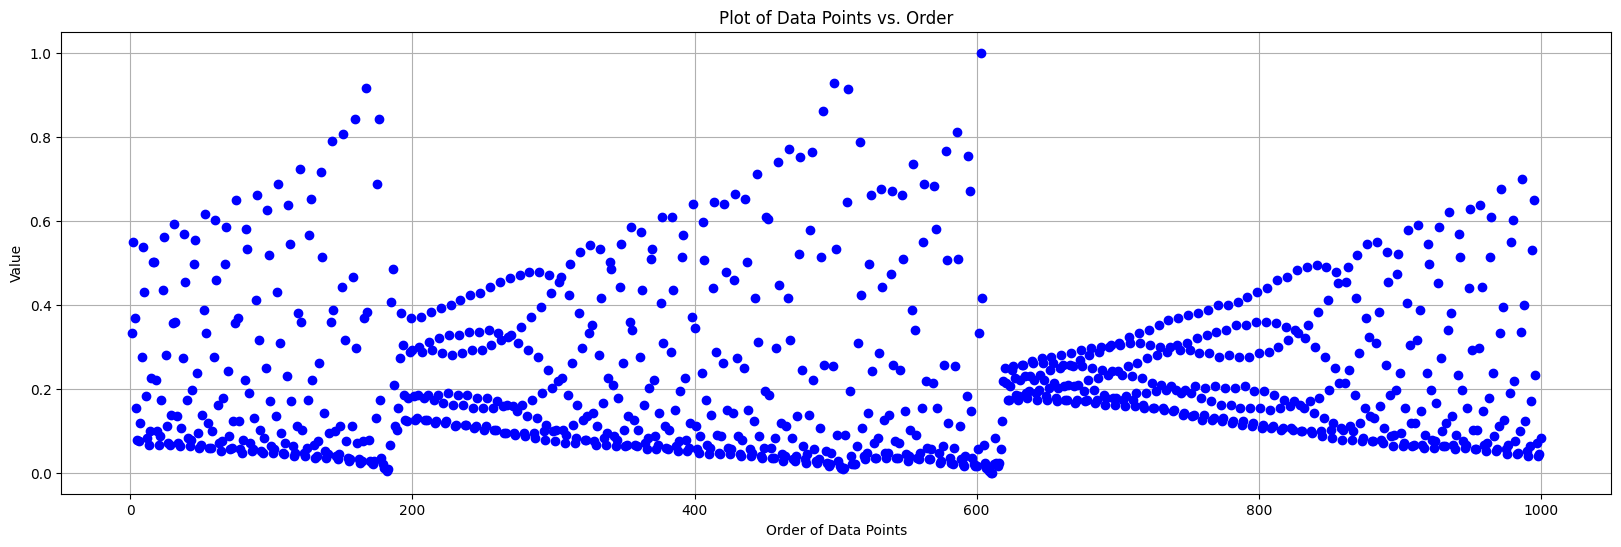

In [104]:

x_values = np.arange(1, len(xtrain) + 1)


plt.figure(figsize=(20, 6))
plt.plot(x_values, xtrain, marker='o', color='b', linestyle='None', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


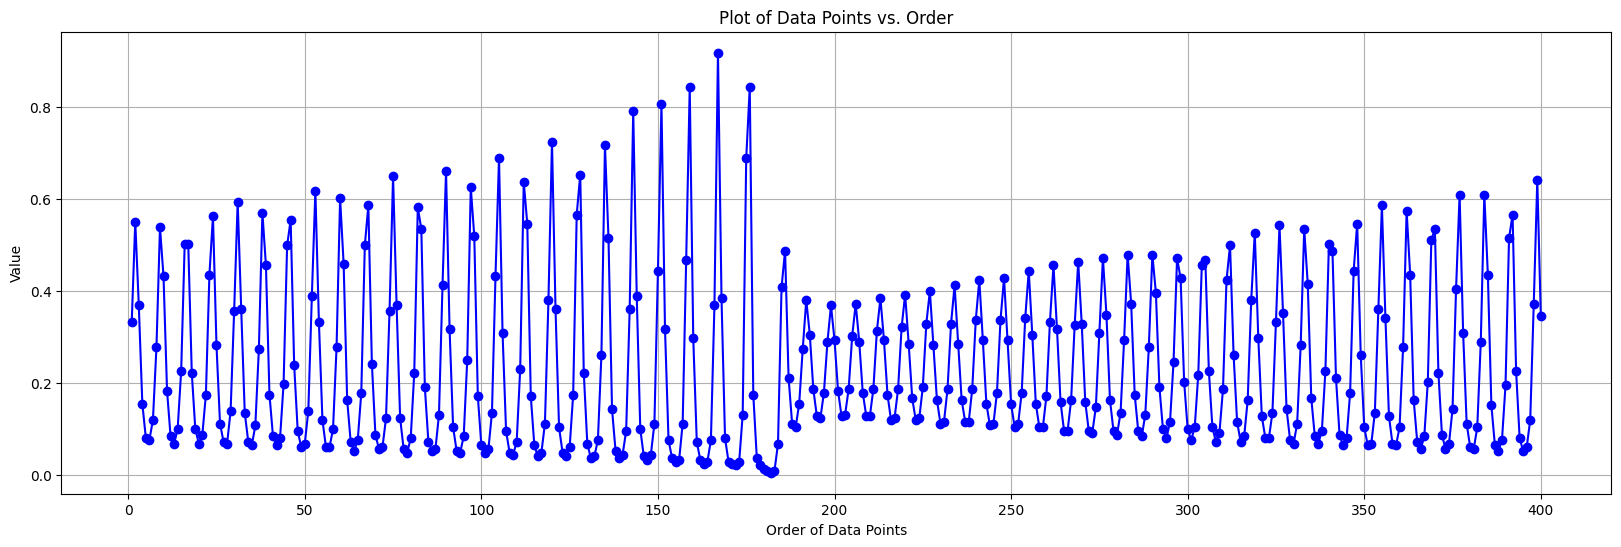

In [105]:

x_values = np.arange(1, len(xtrain) + 1)
x_subset = x_values[:400]
y_subset = xtrain[:400]

plt.figure(figsize=(20, 6))
plt.plot(x_subset, y_subset, marker='o', color='b', linestyle='-', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


In [106]:
print(xtrain.shape)


(1000,)


#Splitting the data


In [107]:
import numpy as np

def prepare_and_split(df, window_size=10):
    def df_to_X_y(df, window_size):
        df_as_np = df.to_numpy()
        X, y = [], []
        for i in range(len(df_as_np) - window_size):
            row = [[a] for a in df_as_np[i:i + window_size]]
            X.append(row)
            y.append(df_as_np[i + window_size])
        return np.array(X), np.array(y)

    X, y = df_to_X_y(df, window_size)

    # fixed splits
    X_train, y_train = X[:800], y[:800]
    X_val, y_val = X[800:870], y[800:870]
    X_test, y_test = X[870:], y[870:]

    return X_train, y_train, X_val, y_val, X_test, y_test


In [108]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_and_split(xtrain, window_size=10)


In [126]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_train shape: (800, 10, 1)
y_train shape: (800,)
X_val shape: (70, 10, 1)
y_val shape: (70,)


# COMPARISON- lstm - vanilla rnn - linear regression

## LSTM

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
bmodel_lstm = Sequential()
bmodel_lstm.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
bmodel_lstm.add(Dense(1))
bmodel_lstm.compile(optimizer='adam', loss='mse')

# Train the model
bmodel_lstm.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Predict on validation set
lstm_pred = bmodel_lstm.predict(X_val)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


## Vanilla RNN

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
bmodel_rnn = Sequential()
bmodel_rnn.add(SimpleRNN(64, input_shape=(X_train.shape[1], 1)))
bmodel_rnn.add(Dense(1))
bmodel_rnn.compile(optimizer='adam', loss='mse')

# Train the model
bmodel_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

# Predict on validation set
rnn_pred = bmodel_rnn.predict(X_val)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


## Comparison

In [111]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{name} - MSE: {mse:.4f}, MAE: {mae:.4f}")


evaluate_model("LSTM", y_val, lstm_pred)
bmodel_lstm.summary()

evaluate_model("Vanilla RNN", y_val, rnn_pred)
bmodel_rnn.summary()





LSTM - MSE: 0.0032, MAE: 0.0440


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,885 (198.77 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 33,924 (132.52 KB)

Vanilla RNN - MSE: 0.0040, MAE: 0.0496


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_106 (SimpleRNN)      │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,869 (50.27 KB)

 Trainable params: 4,289 (16.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,580 (33.52 KB)

# Tunning RNN

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import MultipleLocator

In [113]:


def rnn_grid_search(data, window_sizes, num_layers_list, units_list, dropout_rates, epochs=5, batch_size=32):
    results = []

    for window_size in window_sizes:
        # Prepare data for this window size
        X_train, y_train, X_val, y_val, X_test, y_test = prepare_and_split(data, window_size)

        input_shape = (X_train.shape[1], X_train.shape[2])  # e.g. (window_size, 1)

        for num_layers in num_layers_list:
            for units in units_list:
                for dropout_rate in dropout_rates:
                    # Build model
                    model = Sequential()
                    for i in range(num_layers):
                        return_sequences = i < num_layers - 1
                        model.add(SimpleRNN(units, return_sequences=return_sequences,
                                            input_shape=input_shape if i == 0 else None))
                        if dropout_rate > 0:  # Add dropout only if the rate is greater than 0
                            model.add(Dropout(dropout_rate))
                    model.add(Dense(1))
                    model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

                    # Train the model
                    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                        validation_data=(X_val, y_val), verbose=0)

                    # Evaluate the model
                    preds = model.predict(X_val)
                    mse = mean_squared_error(y_val, preds)
                    mae = mean_absolute_error(y_val, preds)

                    results.append({
                        'window_size': window_size,
                        'num_layers': num_layers,
                        'units': units,
                        'dropout_rate': dropout_rate,
                        'val_mse': mse,
                        'val_mae': mae
                    })

                    print(f"✅ window={window_size}, layers={num_layers}, units={units}, dropout={dropout_rate} | MSE={mse:.4f}, MAE={mae:.4f}")

    return results


In [114]:
results = rnn_grid_search(
    data=xtrain,
    window_sizes=[5, 10, 20],
    num_layers_list=[1, 3],
    units_list=[32, 64],
    dropout_rates=[0.0, 0.2, 0.5],
    epochs=5
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
✅ window=5, layers=1, units=32, dropout=0.0 | MSE=0.0030, MAE=0.0440


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
✅ window=5, layers=1, units=32, dropout=0.2 | MSE=0.0034, MAE=0.0418


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
✅ window=5, layers=1, units=32, dropout=0.5 | MSE=0.0035, MAE=0.0396


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
✅ window=5, layers=1, units=64, dropout=0.0 | MSE=0.0035, MAE=0.0403


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
✅ window=5, layers=1, units=64, dropout=0.2 | MSE=0.0026, MAE=0.0356


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
✅ window=5, layers=1, units=64, dropout=0.5 | MSE=0.0031, MAE=0.0388


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step
✅ window=5, layers=3, units=32, dropout=0.0 | MSE=0.0018, MAE=0.0308


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step
✅ window=5, layers=3, units=32, dropout=0.2 | MSE=0.0039, MAE=0.0442


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 189ms/step
✅ window=5, layers=3, units=32, dropout=0.5 | MSE=0.0075, MAE=0.0756


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
✅ window=5, layers=3, units=64, dropout=0.0 | MSE=0.0024, MAE=0.0362


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step
✅ window=5, layers=3, units=64, dropout=0.2 | MSE=0.0044, MAE=0.0501


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
✅ window=5, layers=3, units=64, dropout=0.5 | MSE=0.0063, MAE=0.0530


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
✅ window=10, layers=1, units=32, dropout=0.0 | MSE=0.0022, MAE=0.0375


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
✅ window=10, layers=1, units=32, dropout=0.2 | MSE=0.0038, MAE=0.0457


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
✅ window=10, layers=1, units=32, dropout=0.5 | MSE=0.0061, MAE=0.0650


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
✅ window=10, layers=1, units=64, dropout=0.0 | MSE=0.0039, MAE=0.0526


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
✅ window=10, layers=1, units=64, dropout=0.2 | MSE=0.0034, MAE=0.0461


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
✅ window=10, layers=1, units=64, dropout=0.5 | MSE=0.0049, MAE=0.0491


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 196ms/step
✅ window=10, layers=3, units=32, dropout=0.0 | MSE=0.0010, MAE=0.0266


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step
✅ window=10, layers=3, units=32, dropout=0.2 | MSE=0.0082, MAE=0.0758


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 222ms/step
✅ window=10, layers=3, units=32, dropout=0.5 | MSE=0.0049, MAE=0.0588


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step
✅ window=10, layers=3, units=64, dropout=0.0 | MSE=0.0009, MAE=0.0249


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 181ms/step
✅ window=10, layers=3, units=64, dropout=0.2 | MSE=0.0038, MAE=0.0523


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 192ms/step
✅ window=10, layers=3, units=64, dropout=0.5 | MSE=0.0071, MAE=0.0571


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
✅ window=20, layers=1, units=32, dropout=0.0 | MSE=0.0020, MAE=0.0334


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
✅ window=20, layers=1, units=32, dropout=0.2 | MSE=0.0029, MAE=0.0463


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
✅ window=20, layers=1, units=32, dropout=0.5 | MSE=0.0052, MAE=0.0568


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
✅ window=20, layers=1, units=64, dropout=0.0 | MSE=0.0018, MAE=0.0331


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
✅ window=20, layers=1, units=64, dropout=0.2 | MSE=0.0036, MAE=0.0517


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
✅ window=20, layers=1, units=64, dropout=0.5 | MSE=0.0024, MAE=0.0367


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
✅ window=20, layers=3, units=32, dropout=0.0 | MSE=0.0019, MAE=0.0326


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 193ms/step
✅ window=20, layers=3, units=32, dropout=0.2 | MSE=0.0098, MAE=0.0665


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 186ms/step
✅ window=20, layers=3, units=32, dropout=0.5 | MSE=0.0365, MAE=0.1505


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 195ms/step
✅ window=20, layers=3, units=64, dropout=0.0 | MSE=0.0018, MAE=0.0330


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 263ms/step
✅ window=20, layers=3, units=64, dropout=0.2 | MSE=0.0045, MAE=0.0596


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step
✅ window=20, layers=3, units=64, dropout=0.5 | MSE=0.0071, MAE=0.0766


In [115]:
import pandas as pd
df_results = pd.DataFrame(results)
print(df_results.sort_values(by=['val_mse', 'val_mae']))


    window_size  num_layers  units  dropout_rate   val_mse   val_mae
21           10           3     64           0.0  0.000926  0.024946
18           10           3     32           0.0  0.001029  0.026646
6             5           3     32           0.0  0.001779  0.030754
33           20           3     64           0.0  0.001816  0.032983
27           20           1     64           0.0  0.001842  0.033123
30           20           3     32           0.0  0.001898  0.032595
24           20           1     32           0.0  0.002013  0.033381
12           10           1     32           0.0  0.002223  0.037516
9             5           3     64           0.0  0.002435  0.036243
29           20           1     64           0.5  0.002436  0.036675
4             5           1     64           0.2  0.002582  0.035577
25           20           1     32           0.2  0.002930  0.046339
0             5           1     32           0.0  0.003042  0.043953
5             5           1     64

### Plotting best

In [120]:
best_row = df_results.sort_values(by='val_mse').iloc[0]

best_window = int(best_row['window_size'])
best_layers = int(best_row['num_layers'])
best_units = int(best_row['units'])
best_dropout_rate = int(best_row['dropout_rate'])

print(f"Best config: window={best_window}, layers={best_layers}, units={best_units}, dropout={best_dropout_rate}")


Best config: window=10, layers=3, units=64, dropout=0


In [121]:
X_train, y_train, X_val, y_val, X_test, y_test = prepare_and_split(xtrain, window_size=best_window)
input_shape = (X_train.shape[1], X_train.shape[2])  # (window_size, 1)

In [122]:


model = Sequential()

for i in range(best_layers):
    return_sequences = i < best_layers - 1
    model.add(SimpleRNN(best_units, return_sequences=return_sequences,
                        input_shape=input_shape if i == 0 else None))

    if best_dropout_rate > 0:
        model.add(Dropout(best_dropout_rate))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)


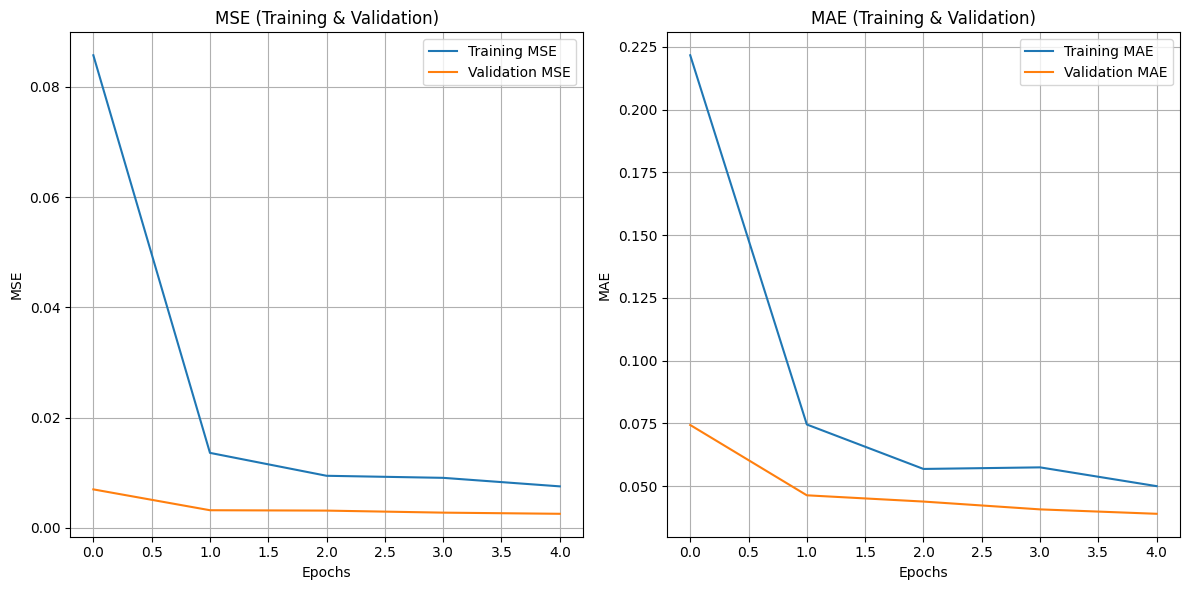

In [123]:
import matplotlib.pyplot as plt

# Plot MSE (Training and Validation)
plt.figure(figsize=(12, 6))

# MSE plot (training and validation)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training MSE')
plt.plot(history.history['val_loss'], label='Validation MSE')
plt.title('MSE (Training & Validation)')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

# MAE plot (training and validation)
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE (Training & Validation)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
